In [1]:
%load_ext autoreload
%autoreload 2

from ryn.common import helper
helper.notebook()

changing directory


In [2]:
from ryn.graphs import split
from ryn.graphs import loader

g = loader.load_graphs_from_uri('cde.m-trainvalidtest')[0]
print(f'loaded {g.str_stats}')

rels = split.Relation.from_graph(g)
rels.sort(key=lambda rel: rel.ratio)
print(f'retrieved {len(rels)} relations')

loaded ryn graph: cde.m-trainvalidtest
  nodes: 17050
  edges: 206205 (51 types)
  degree:
    mean 24.19
    median 13

retrieved 51 relations


In [3]:
from tabulate import tabulate

rows = [(i, r.r, r.ratio, len(r.hs), len(r.ts), r.name) for i, r in enumerate(rels, 1)]

N = 10

print(f'first {N}')
print(tabulate(rows[:N]))

# print(f'mid {N}')
# m = len(rows) / 2
# print(tabulate(rows[int(m-N/2):int(m+N/2)]))

# print(f'last {N}')
# print(tabulate(rows[-N:]))

first 10
--  --  ----------  -----  ---  ------------------------------------------
 1  11  0.00631622   9816   62  P1412:languages spoken, written, or signed
 2  14  0.0104914    3622   38  P1303:instrument
 3  25  0.015873     2520   40  P140:religion
 4   3  0.0168763   13036  220  P27:country of citizenship
 5  19  0.01983       353    7  P30:continent
 6   8  0.0201889    3071   62  P509:cause of death
 7   5  0.0248385    2013   50  P172:ethnic group
 8  41  0.0263158     152    4  P2348:time period
 9  20  0.0275862    2175   60  P102:member of political party
10   2  0.028528    13145  375  P106:occupation
--  --  ----------  -----  ---  ------------------------------------------


In [4]:
N, M = 150, 5

# i=28 r.r=43 0.2353 P50:author

gen = rels[:N]
# gen = [r for r in rels if r.name in whitelist]

for i, r in enumerate(gen, 1):
    print(f'\n{i=} {r.r=} {r.ratio:2.4f} {r.name[:100]} {len(r.triples)=}')
    ents = r.hs if len(r.hs) < len(r.ts) else r.ts
    for e in list(ents)[:M]:
        print('    ', f'{e=}', g.source.ents[e])


i=1 r.r=11 0.0063 P1412:languages spoken, written, or signed len(r.triples)=12584
     e=6025 Q1617:Urdu
     e=6413 Q9168:Persian
     e=9486 Q9301:Serbo-Croatian
     e=11151 Q9035:Danish
     e=5648 Q9091:Belarusian

i=2 r.r=14 0.0105 P1303:instrument len(r.triples)=6076
     e=3841 Q9798:saxophone
     e=5251 Q8350:trombone
     e=1667 Q1343007:electronic keyboard
     e=10374 Q11404:drum
     e=13958 Q3382191:upright piano

i=3 r.r=25 0.0159 P140:religion len(r.triples)=2651
     e=11779 Q9585:Shia Islam
     e=12166 Q170208:Religious Society of Friends
     e=1159 Q678551:American Jews
     e=14344 Q188814:Serbian Orthodox Church
     e=8713 Q13211738:atheist

i=4 r.r=3 0.0169 P27:country of citizenship len(r.triples)=16828
     e=2560 Q974:Democratic Republic of the Congo
     e=2 Q1041:Senegal
     e=515 Q79:Egypt
     e=11269 Q23366230:Republic of Geneva
     e=2566 Q298:Chile

i=5 r.r=19 0.0198 P30:continent len(r.triples)=391
     e=5862 Q18:South America
     e=7402 Q538:O

     e=13826 Q104994:Los Angeles County
     e=9 Q268970:Republic of German-Austria
     e=3082 Q28513:Austria-Hungary
     e=5647 Q70972:Kingdom of France
     e=8725 Q2966:Heidelberg

i=40 r.r=23 0.8712 P737:influenced by len(r.triples)=1508
     e=2049 Q348916:Bruce Chatwin
     e=6149 Q572741:Kwame Anthony Appiah
     e=4107 Q991:Fyodor Dostoyevsky
     e=6162 Q75814:Wilhelm Wundt
     e=8211 Q49074:Kurt Vonnegut

i=41 r.r=42 0.8909 P138:named after len(r.triples)=57
     e=3201 Q162269:Jefferson Davis
     e=1923 Q174:São Paulo
     e=14596 Q588:Katowice
     e=4232 Q49111:Cambridge
     e=765 Q750:Bolivia

i=42 r.r=36 0.9483 P112:founded by len(r.triples)=67
     e=259 Q801:Israel
     e=262 Q203059:Virgin Records
     e=8329 Q389284:Aftermath Entertainment
     e=2957 Q901677:Romanian Academy
     e=143 Q1542213:Lee Strasberg Theatre and Film Institute

i=43 r.r=30 0.9537 P40:child len(r.triples)=391
     e=10250 Q62310:Senta Berger
     e=4116 Q80510:Alla Pugacheva
     e=12315

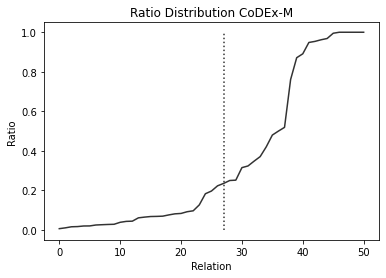

In [6]:
import ryn
from ryn.common import plotter

path = ryn.ENV.SPLIT_DIR / f'{g.name}.ratio'
path.parent.mkdir(exist_ok=True, parents=True)

name = "CoDEx-M"
plt = plotter.Plotter(title=f'Ratio Distribution {name or g.name}', xlabel='Relation', ylabel='Ratio', fname=str(path))
plt.ax.plot(range(len(rels)), [r.ratio for r in rels], color=plotter.CLR[0]) # , marker=".")
plt.ax.vlines(27, 0, 1, color=plotter.CLR[0], linestyle='dotted')

print()
plt.plot()
print()